# Principal Component Analysis using Sklearn on Iris Dataset
##  CPE 490 590
### Author: Rahul Bhadani

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

# Load the Iris Dataset

In [1]:
import pandas as pd
# load dataset
Iris = pd.read_csv("Dataset/Iris/iris.data")
Iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Extract Features and Class (Labels)

In [3]:
X = Iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
Labels = Iris[["Class"]]

# Scale The Features

In [5]:
# Standardize the features to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Apply PCA

In [7]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # We are reducing dimension to 2
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame that will help us in plotting


In [8]:
plot_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
plot_df = pd.concat([plot_df, Labels], axis = 1)

# Plot

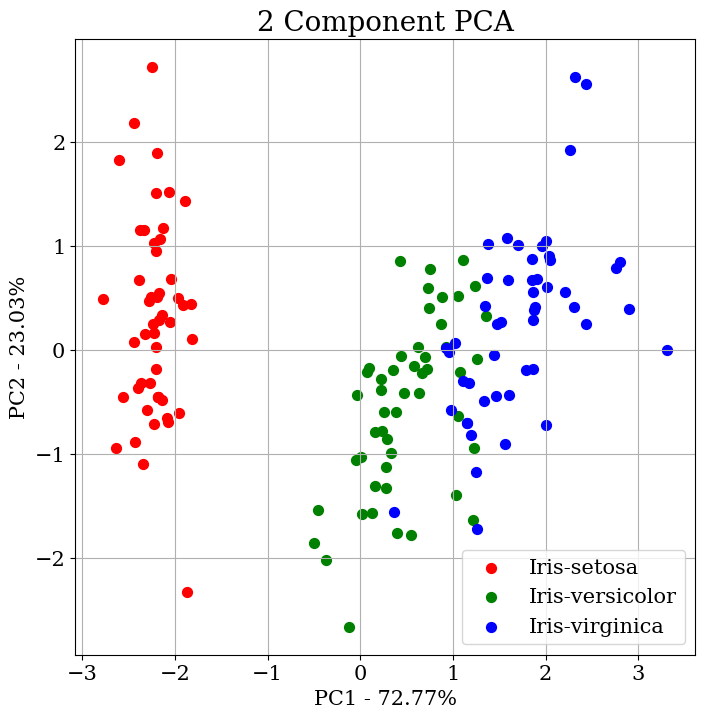

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(classes, colors):
    indicesToKeep = plot_df['Class'] == target
    ax.scatter(plot_df.loc[indicesToKeep, 'PC1'], plot_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

ax.legend(classes)
ax.grid()
plt.xlabel('PC1 - {0}%'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 - {0}%'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.show()

# Observation

We see that in latent space, three types of Iris leaves are distinguishable